In [15]:
import pandas as pd # Use the work with the data 2frames
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [16]:
rp_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Rockport/Rockport_1993-2002_pwl_harmwl_bwl.csv')
rp_9300_LH.drop(labels=range(876480,876486),axis = 0, inplace = True)
rp_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Rockport/Rockport_2003-2012_pwl_harmwl_bwl.csv')
rp_0112_LH.drop(labels=range(876720,876726), axis = 0, inplace=True)
rp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Rockport/Rockport_2013-2023_pwl_harmwl_bwl.csv')
rp_1323_LH.drop(labels=range(len(rp_1323_LH)-6,len(rp_1323_LH)), axis=0, inplace=True)
directory_path = '/Users/rprocious/Downloads/data 2/NOAA/rockport/'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

rp_NOAA = pd.concat(dataframes, ignore_index=True)
rp_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
rp_NOAA.reset_index(drop = True, inplace=True)
frames = [rp_9300_LH,rp_0112_LH,rp_1323_LH]
rp_LH = pd.concat(frames, ignore_index=True)
rp_LH.drop(labels=range(0,262800),axis=0, inplace=True)
rp_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = rp_LH['#date+time']
comparison_df['Lighthouse WL'] = rp_LH['015-pwl']
comparison_df['NOAA WL'] = rp_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_56577/505073128.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Rockport/Rockport_1993-2002_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_56577/505073128.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Rockport/Rockport_2013-2023_pwl_harmwl_bwl.csv')


,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,NaN,NaN
2454476,2023-12-31 23:36:00,NaN,NaN
2454477,2023-12-31 23:42:00,NaN,NaN
2454478,2023-12-31 23:48:00,NaN,NaN
2454479,2023-12-31 23:54:00,NaN,NaN


In [17]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


Text(0.5, 1.0, 'NOAA interpolation into a time shift')

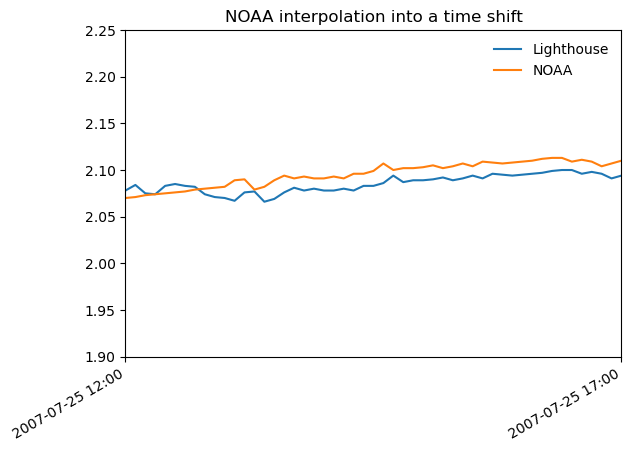

In [70]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 12:00')

end_date = pd.to_datetime('2007-07-25 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('NOAA interpolation into a time shift')

In [68]:
date_index_locater('2007-07-25 15:00','2007-07-25 17:00')

[1013670,
 1013671,
 1013672,
 1013673,
 1013674,
 1013675,
 1013676,
 1013677,
 1013678,
 1013679,
 1013680,
 1013681,
 1013682,
 1013683,
 1013684,
 1013685,
 1013686,
 1013687,
 1013688,
 1013689,
 1013690]

In [75]:
comparison_df[1013470:1013690]

,Dates,Lighthouse WL,NOAA WL
1013470,2007-07-24 19:00:00,NaN,2.065
1013471,2007-07-24 19:06:00,NaN,2.064
1013472,2007-07-24 19:12:00,NaN,2.062
1013473,2007-07-24 19:18:00,NaN,2.061
1013474,2007-07-24 19:24:00,NaN,2.060
...,...,...,...
1013685,2007-07-25 16:30:00,2.100,2.109
1013686,2007-07-25 16:36:00,2.096,2.111
1013687,2007-07-25 16:42:00,2.098,2.109
1013688,2007-07-25 16:48:00,2.096,2.104


In [76]:
#drops a nan value before time shift
revised_LH = pd.DataFrame()
revised_LH['Adjusted LH WL'] = comparison_df['Lighthouse WL']
revised_LH.drop(1013471,axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted LH WL'] = revised_LH['Adjusted LH WL']
comparison_df[1013670:1013700]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
1013670,2007-07-25 15:00:00,2.089,2.103,2.090
1013671,2007-07-25 15:06:00,2.090,2.105,2.092
1013672,2007-07-25 15:12:00,2.092,2.102,2.089
1013673,2007-07-25 15:18:00,2.089,2.104,2.091
1013674,2007-07-25 15:24:00,2.091,2.107,2.094
1013675,2007-07-25 15:30:00,2.094,2.104,2.091
1013676,2007-07-25 15:36:00,2.091,2.109,2.096
1013677,2007-07-25 15:42:00,2.096,2.108,2.095
1013678,2007-07-25 15:48:00,2.095,2.107,2.094
1013679,2007-07-25 15:54:00,2.094,2.108,2.095


In [80]:
differences = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']
non_zero_differences = differences != 0

filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)
mask = abs(cleaned_remaining_differences['Difference']) >= 0.005

cleaned_remaining_differences = cleaned_remaining_differences[mask]


for i in range(1, 11):
    cleaned_remaining_differences[f'Next_{i}'] = cleaned_remaining_differences['Difference'].shift(-i)

# Check if the current value is equal to the next 10 values
cleaned_remaining_differences['All_Next_10_Equal'] = cleaned_remaining_differences.apply(lambda row: all(row['Difference'] == row[f'Next_{i}'] for i in range(1, 11)), axis=1)

# Drop the helper columns if they are no longer needed
cleaned_remaining_differences.drop(columns=[f'Next_{i}' for i in range(1, 11)], inplace=True)


mask = cleaned_remaining_differences['All_Next_10_Equal'] == True

# Filter the DataFrame using the mask
cleaned_remaining_differences = cleaned_remaining_differences[mask]

# Reset index if needed
cleaned_remaining_differences.reset_index(drop=True, inplace=True)

cleaned_remaining_differences.to_clipboard()

0.008,-0.013,0.006

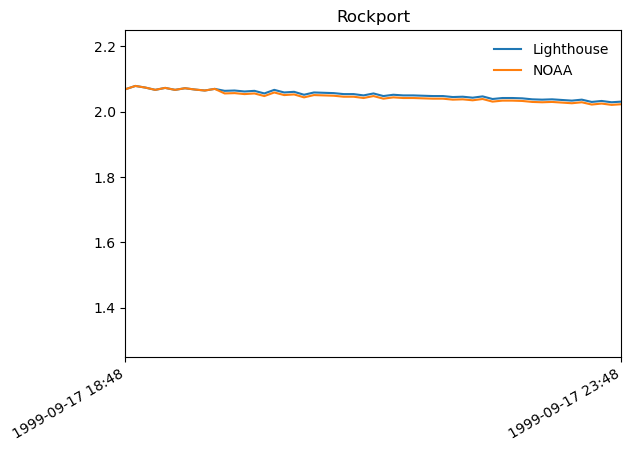

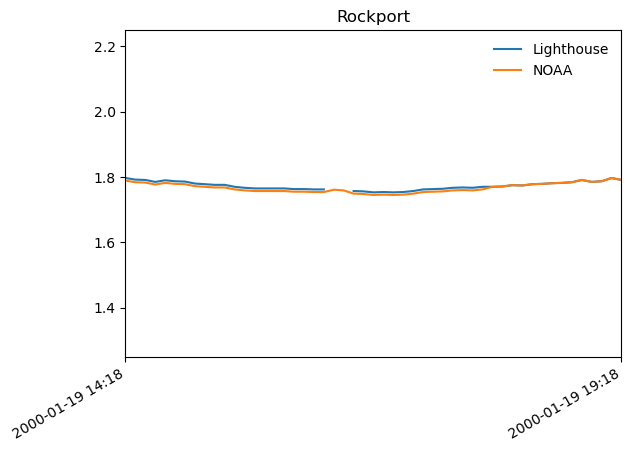

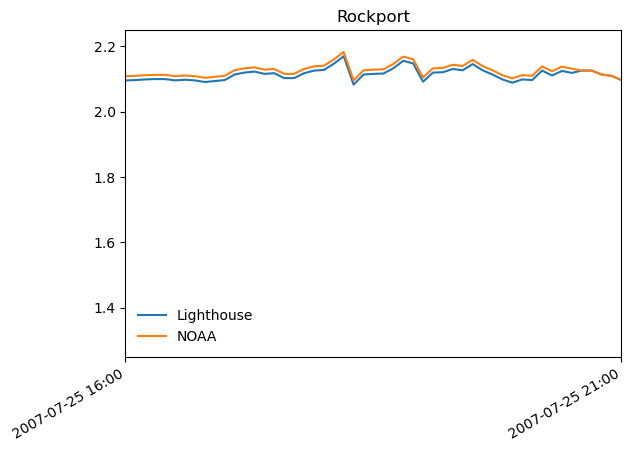

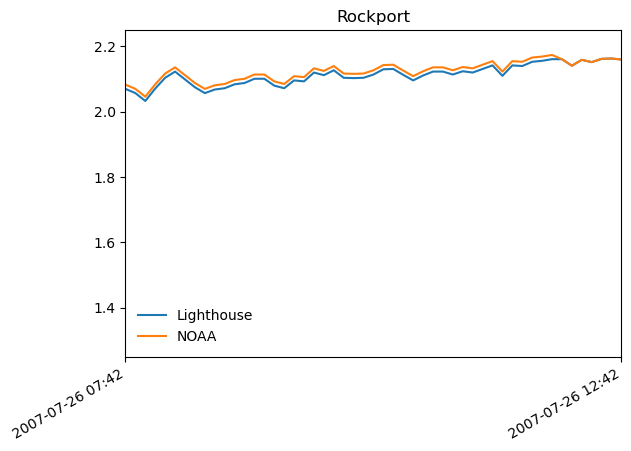

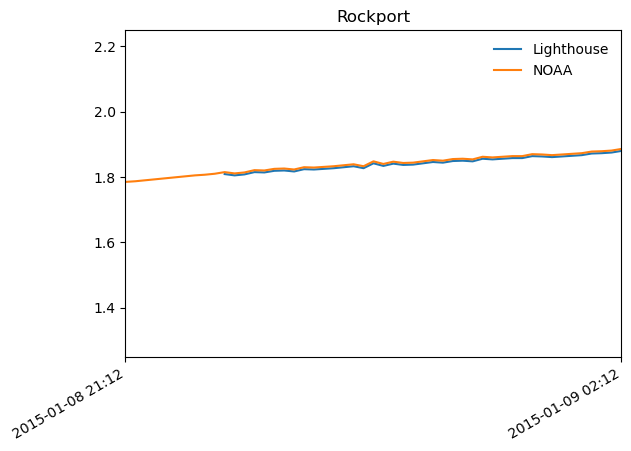

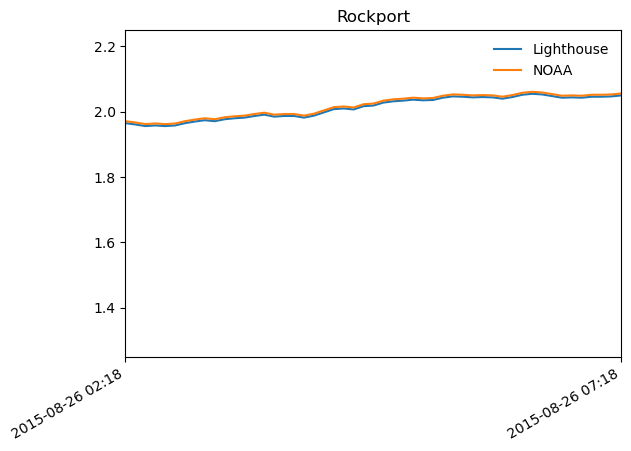

In [83]:
start_dates = ('1999-09-17 19:48','2000-01-19 15:18','2007-07-25 17:00','2007-07-26 08:42','2015-01-08 22:12','2015-08-26 03:18')

for i in range(len(start_dates)):
    plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

    plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

    plt.gcf().autofmt_xdate()

    plt.ylim(1.25,2.25)

    start_date = pd.to_datetime(start_dates[i]) - pd.DateOffset(hours= 1)

    end_date = pd.to_datetime(start_dates[i]) + pd.DateOffset(hours = 4)

    plt.xlim(start_date, end_date)
    plt.legend(frameon = False)
    plt.title('Rockport')
    plt.show()